# Random Walk Generation

$$\frac{S_{t + dt} - S_t}{S_t} = µdt + 𝛔\sqrt{dt}𝛏$$

**where**

* $𝛏$ = *zai*
* $𝛔$ = *sigma*
* $µ$ = *mui*

In [25]:
import numpy as np
import pandas as pd

# geometric brownian motion (gbm)
def gbm(n_years=10, n_scenarios=1000, mui=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion model
    """
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)

    zai = np.random.normal(size=(n_steps, n_scenarios))

    returns = mui * dt + sigma * np.sqrt(dt) * zai
    returns = pd.DataFrame(returns)

    # to prices
    prices = s_0 * (1 + returns).cumprod()

    return prices

In [26]:
prices = gbm(10, n_scenarios=3)

print(prices.shape)

prices

(120, 3)


,0,1,2
0,98.519639,93.934422,99.953015
1,103.270411,94.651849,107.183858
2,106.570250,92.658104,112.654528
3,102.778288,93.494394,114.807293
4,99.041515,98.477027,108.117108
...,...,...,...
115,176.173078,205.211517,130.016980
116,171.728735,184.579800,123.411014
117,178.614622,189.478797,114.712791
118,190.201385,211.444538,117.652235


<Axes: >

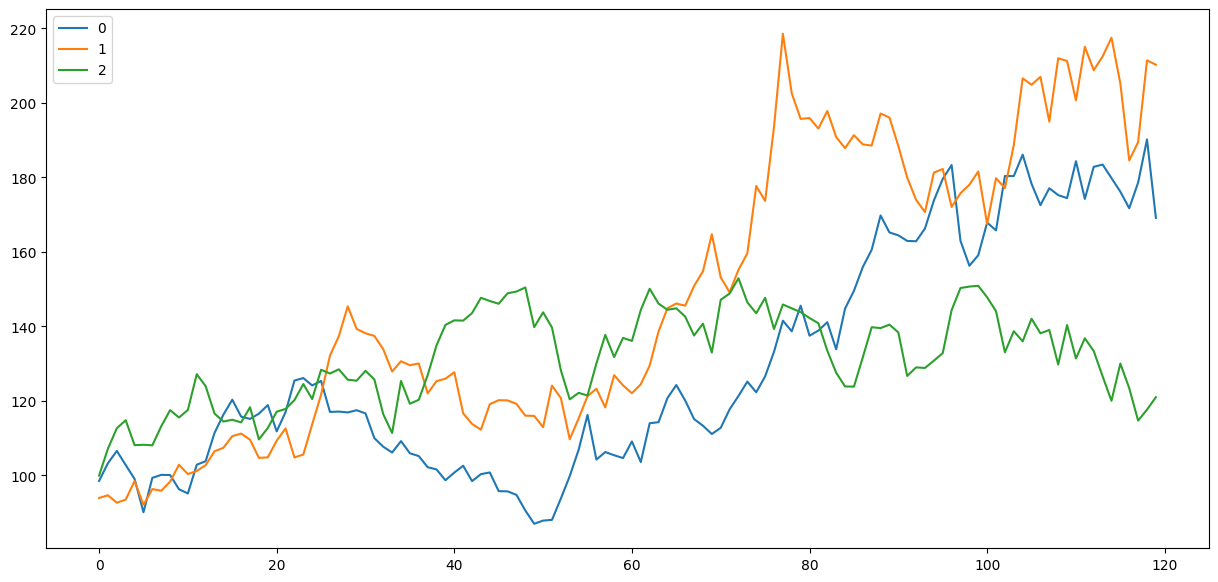

In [27]:
prices.plot(figsize=(15, 7))

In [28]:
prices = gbm(10, n_scenarios=3)

print(prices.shape)

prices

(120, 3)


,0,1,2
0,93.346374,95.021229,103.471664
1,92.415627,89.981704,102.968478
2,91.492130,89.307621,101.652593
3,91.983301,90.926529,102.177601
4,92.788974,92.579941,104.341611
...,...,...,...
115,59.106140,142.401017,149.544715
116,55.153792,150.844448,147.475508
117,55.911252,156.993599,151.598047
118,53.739736,162.281858,155.166331


<Axes: >

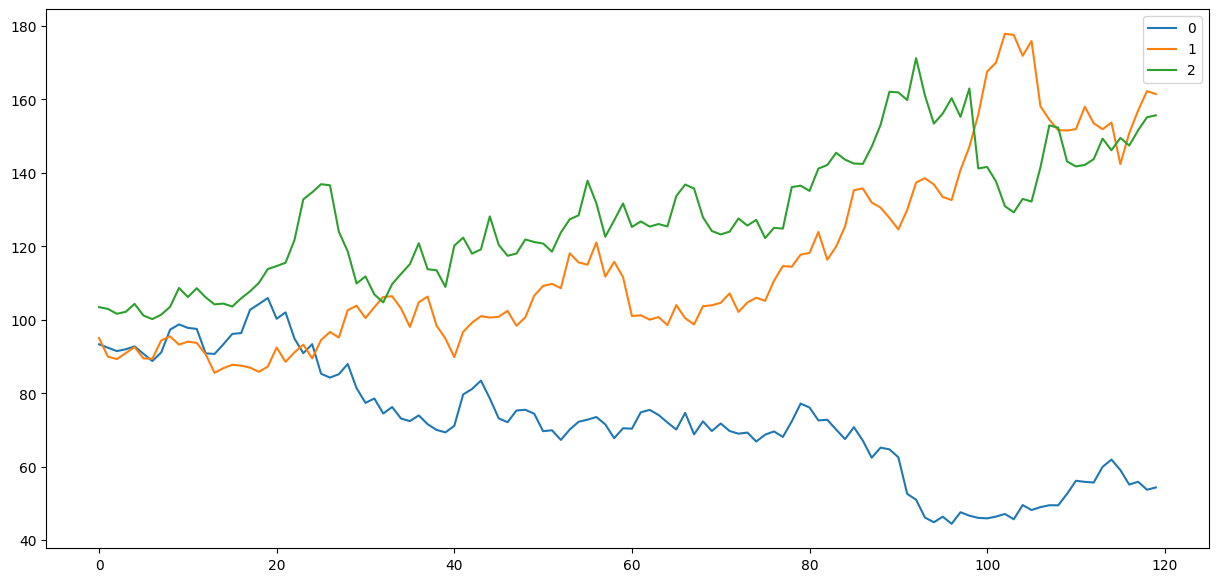

In [29]:
prices.plot(figsize=(15, 7))

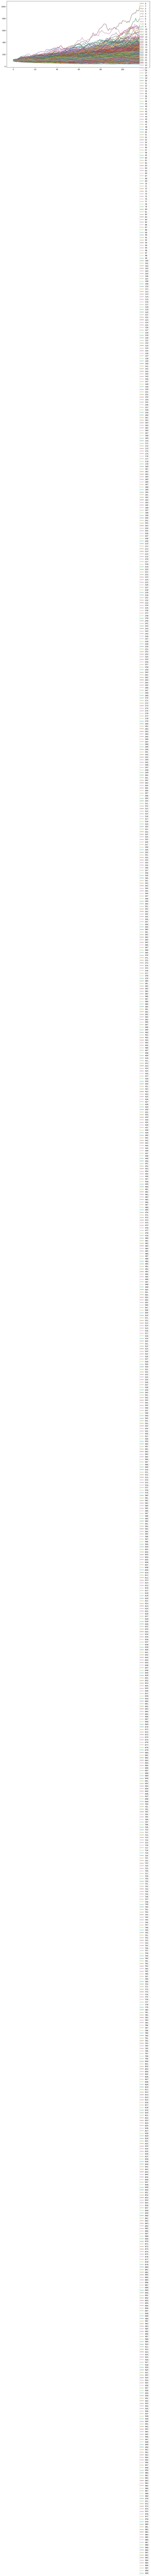

In [30]:
prices = gbm().plot(figsize=(15,7))

In [34]:
import pandas as pd

def gbm_one(n_years=10, n_scenarios=1000, mui=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion model
    """
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)

    # zai = np.random.normal(size=(n_steps, n_scenarios))
    # returns = mui * dt + sigma * np.sqrt(dt) * zai
    # returns = pd.DataFrame(returns)

    returns_plus_1 = np.random.normal(loc=(1 + mui * dt), scale=(sigma * np.sqrt(dt)), size=(n_steps, n_scenarios))

    # to prices
    prices = s_0 * pd.DataFrame(returns_plus_1).cumprod()

    return prices

In [32]:
%timeit gbm(n_years=5, n_scenarios=1000)

2.52 ms ± 208 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
%timeit gbm_one(n_years=5, n_scenarios=1000)

2.54 ms ± 254 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<Axes: >

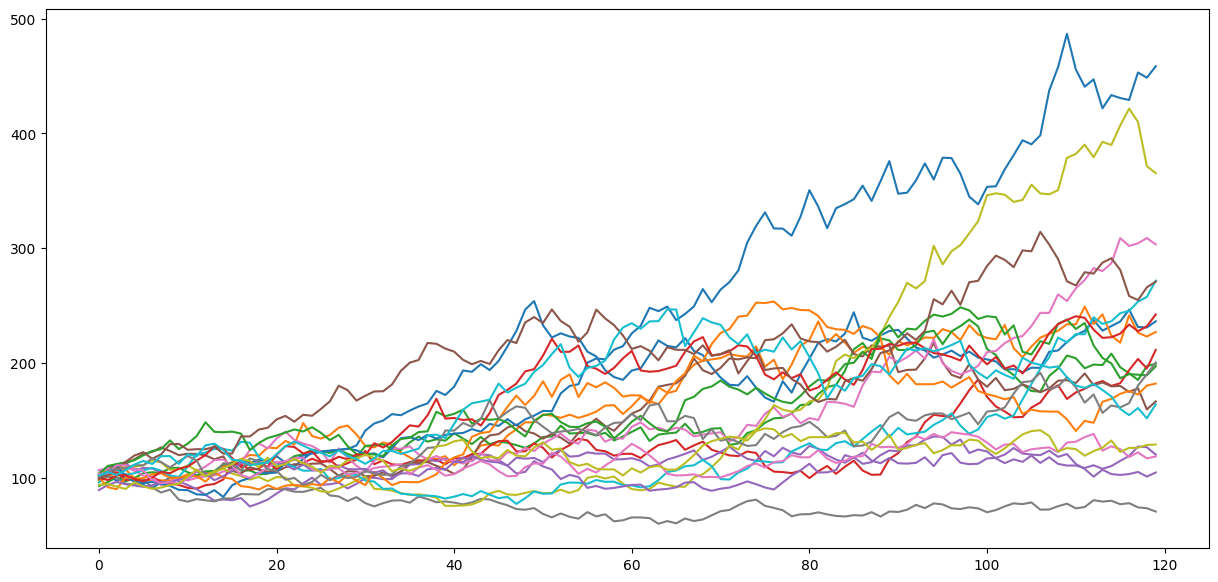

In [36]:
gbm(n_years=10, n_scenarios=20).plot(figsize=(15, 7), legend=False)

In [37]:

def gbm(n_years=10, n_scenarios=1000, mui=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion model
    """
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)

    zai = np.random.normal(size=(n_steps, n_scenarios))

    returns = mui * dt + sigma * np.sqrt(dt) * zai
    returns[0] = 1
    returns = pd.DataFrame(returns)

    # to prices
    prices = s_0 * (1 + returns).cumprod()

    return prices

In [39]:
prices = gbm(n_years=10, n_scenarios=20)

prices

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
1,213.536597,199.912418,201.468224,202.755524,196.100224,189.719415,201.054958,203.594365,191.641269,193.125886,210.387036,214.114973,216.465093,209.319309,190.868617,189.022964,204.160667,195.688695,197.045080,201.098608
2,225.380279,199.836196,206.337655,207.412634,211.214774,199.245753,203.237304,195.625196,190.909538,198.819766,197.974349,202.604269,216.034264,239.758378,183.816360,187.473863,198.495296,191.137725,195.834569,210.018461
3,201.602214,205.521629,222.020672,222.074307,210.204543,199.283131,200.467880,192.900519,198.178159,205.437628,190.454086,207.329553,225.649954,230.491931,178.187296,193.590624,195.403083,196.254301,198.932790,195.896434
4,199.260708,214.863131,228.801302,231.835446,204.616764,195.599876,195.547030,204.201441,199.266780,198.403101,186.312914,208.936496,213.764344,228.891405,187.845043,185.280808,212.199204,192.759684,196.147171,203.118999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,312.167347,289.086350,882.977898,501.037171,236.906893,426.554239,365.778643,232.766622,203.127132,140.210698,166.053084,436.788984,350.354639,508.264221,713.995820,259.284177,207.325507,199.289859,382.661173,149.616012
116,320.741128,299.104040,923.195488,518.691636,225.483470,444.507198,355.983550,219.432470,202.655160,142.579817,167.820963,441.937632,398.704773,533.642873,676.483204,258.577056,222.396193,200.602464,387.249682,154.624398
117,307.203901,320.040606,909.496635,511.391460,232.197082,442.656803,370.965801,213.220763,201.349399,146.788106,178.975120,438.716704,409.929088,580.369752,683.675609,265.291932,219.038083,194.355329,377.223429,150.960078
118,293.145669,312.599361,921.053258,512.801921,240.087487,483.572444,371.203525,227.970453,207.653868,147.530120,189.686278,447.390033,393.847376,556.523151,684.177458,253.715992,212.840933,209.941138,359.449142,158.434273


<Axes: >

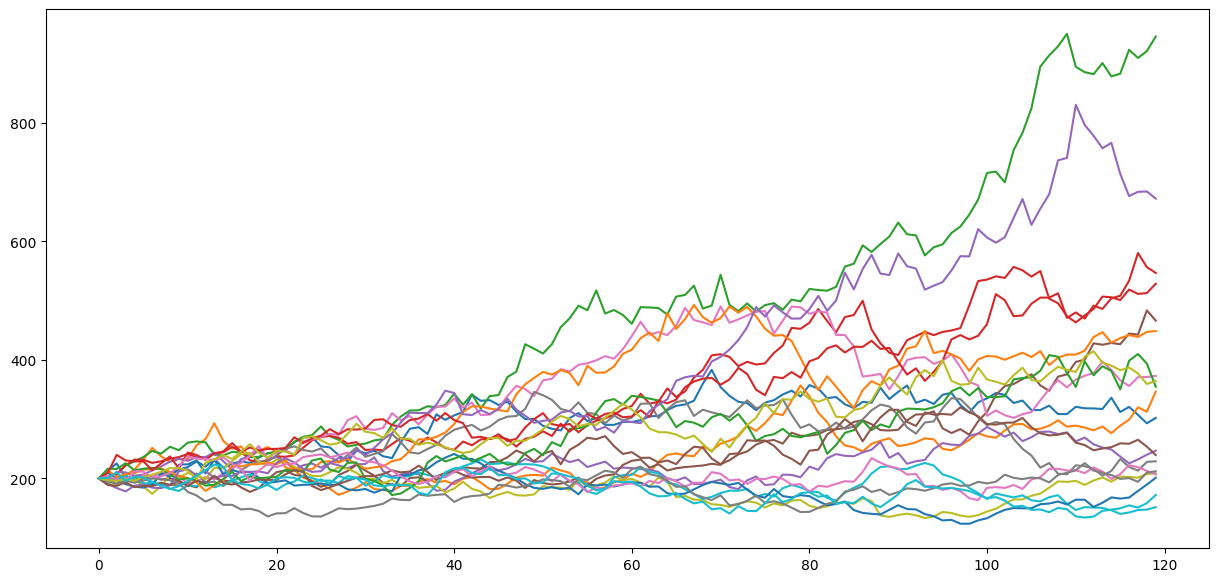

In [54]:
prices.plot(figsize=(15, 7), legend=False)

In [41]:
prices.max()

0     383.280338
1     357.138864
2     950.273792
3     556.973362
4     286.934732
5     483.572444
6     490.308395
7     346.132321
8     243.113095
9     232.230712
10    241.419716
11    492.765856
12    409.929088
13    580.369752
14    830.476519
15    319.928205
16    243.700359
17    226.001639
18    414.692057
19    223.437016
dtype: float64

In [51]:
prices.shape

(120, 20)

<Axes: >

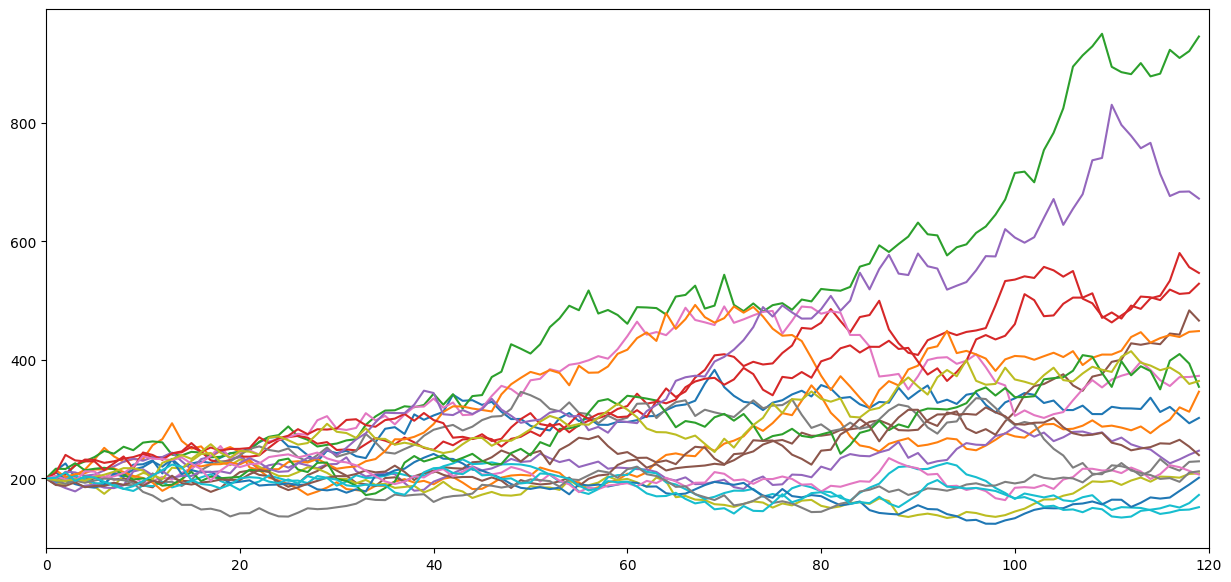

In [52]:
prices.plot(figsize=(15, 7), legend=False, xlim=[0, prices.shape[0]])